Compare the output of the smoothing code when using one or two GPUs

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [6]:
import glob

# Make sure we can find lassi-analysis
import sys
sys.path.append('/home/scratch/psalas/LASSI/lassi-analysis_v2')

from plotting import barChartPlot, surfacePlot
from lassiAnalysis import processLeicaScan, extractZernikesLeicaScanPair

In [4]:
# Parameters for processing (segmenting and smoothing) the raw PTX data.
n = 512
xOffset = -44; yOffset=-6.5; rot=80.; radius=49.
path = "/home/sandboxes/jbrandt/9oct2019/9oct2019"

/home/sandboxes/jbrandt/9oct2019/9oct2019/409_*.ptx
Processing: /home/sandboxes/jbrandt/9oct2019/9oct2019/409_2019-10-10_23:43:48.ptx
Processing PTX file ...
ProcessNewPTXData with:  [-44, -6.5, 49.0, 49.0, 0.0]
Picking 10000 random data points from a total of 18671048
Skipped 0 non-data lines
Skipped 0 non-data lines
Starting with 18671048 lines of data
Filtered out 0 points of 18671048 ( 0.00%) intensity equal to zero
Now we have 18671048 lines of data
neighborFilter reduces 18671048 points to 18389052 points (281996 filtered, 1.510338 %) using tol: 0.122000
Now we have 18389052 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.63, std= 0.21
Elliptical fitler parameters:
[-44, -6.5, 49.0, 49.0, 0.0]
Filter removed 1744589 points outside the ellipse
The ellipse has semi-major axis 49.00 m, semi-minor axis 49.00 m and angle 0.00 degrees
Now we have 16644463 lines of data
z - limit filtered out 7424028 points below -80.00 and above -10
Rotating about Z by 80.00 degrees
Now we have 

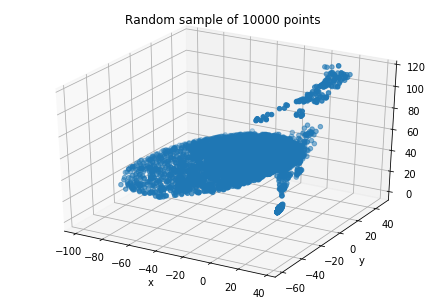

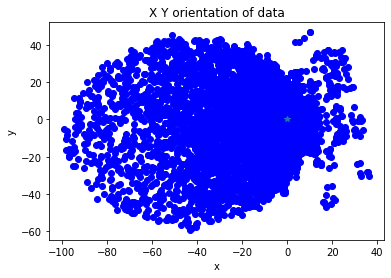

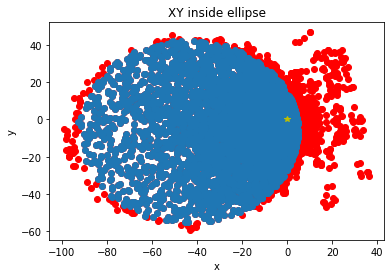

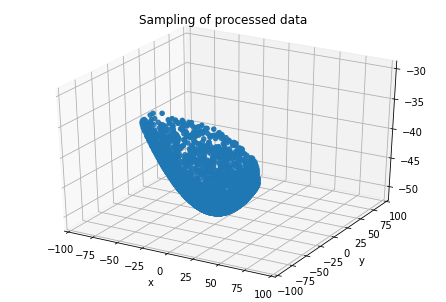

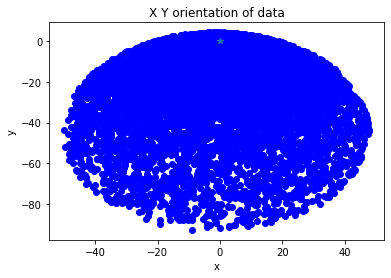

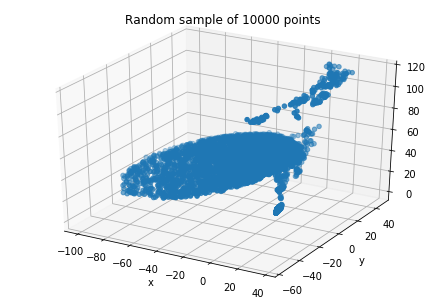

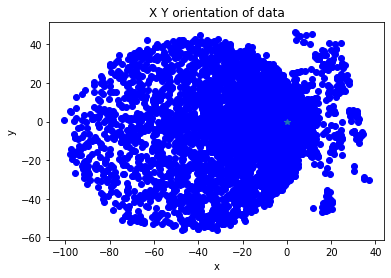

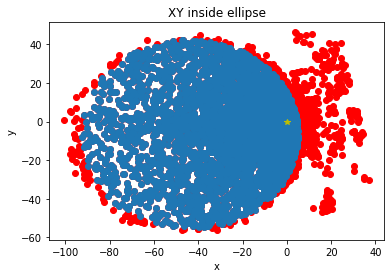

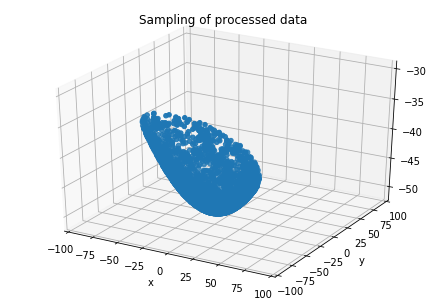

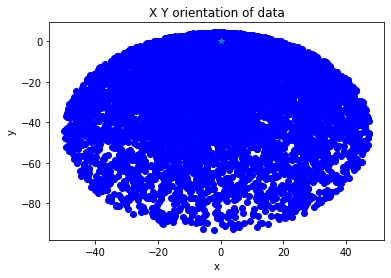

In [4]:
# Only process a pair of scans, reference and signal.
for sn in [409,410]:
    re = '{0}/{1}_*.ptx'.format(path, sn)
    print(re)
    fns = glob.glob(re)
    for fn in fns:
        print('Processing: {}'.format(fn))
        processLeicaScan(fn, N=n, rot=rot, ellipse=[xOffset, yOffset, radius, radius, 0.])

/home/sandboxes/jbrandt/9oct2019/9oct2019/409_*.ptx
Processing: /home/sandboxes/jbrandt/9oct2019/9oct2019/409_2019-10-10_23:43:48.ptx
Processing PTX file ...
ProcessNewPTXData with:  [-44, -6.5, 49.0, 49.0, 0.0]
Picking 10000 random data points from a total of 18671048
Skipped 0 non-data lines
Skipped 0 non-data lines
Starting with 18671048 lines of data
Filtered out 0 points of 18671048 ( 0.00%) intensity equal to zero
Now we have 18671048 lines of data
neighborFilter reduces 18671048 points to 18389052 points (281996 filtered, 1.510338 %) using tol: 0.122000
Now we have 18389052 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.63, std= 0.21
Elliptical fitler parameters:
[-44, -6.5, 49.0, 49.0, 0.0]
Filter removed 1744589 points outside the ellipse
The ellipse has semi-major axis 49.00 m, semi-minor axis 49.00 m and angle 0.00 degrees
Now we have 16644463 lines of data
z - limit filtered out 7424028 points below -80.00 and above -10
Rotating about Z by 80.00 degrees
Now we have 

/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc2/410_2019-10-10_23:50:15.ptx.csv.2.x.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc2/410_2019-10-10_23:50:15.ptx.csv.2.x.csv
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc2/410_2019-10-10_23:50:15.ptx.csv.2.y.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc2/410_2019-10-10_23:50:15.ptx.csv.2.y.csv
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc2/410_2019-10-10_23:50:15.ptx.csv.2.z.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc2/410_2019-10-10_23:50:15.ptx.csv.2.z.csv
Loading from basename:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc2/410_2019-10-10_23:50:15.ptx.csv.2
Smoothed data to shape:  (262144,) (262144,) (262144,)
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/410_2019-10-10_23:50:15.ptx.csv.x.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/410_2019-10-10_23:50:15.ptx.csv.y.csv
Saving smoot

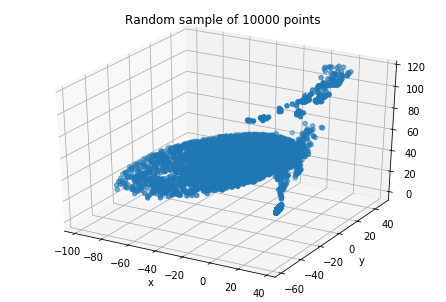

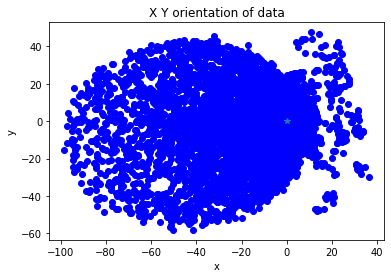

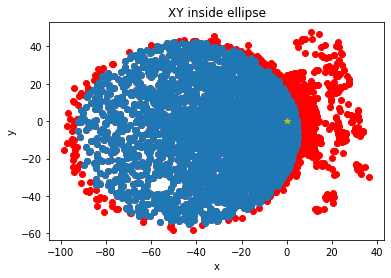

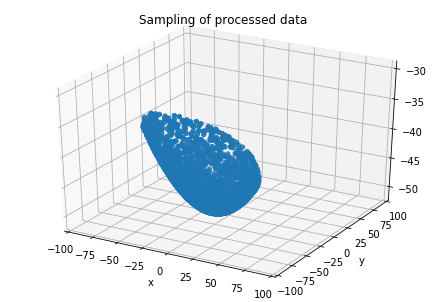

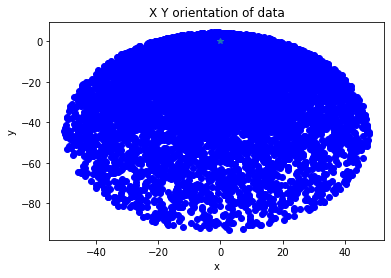

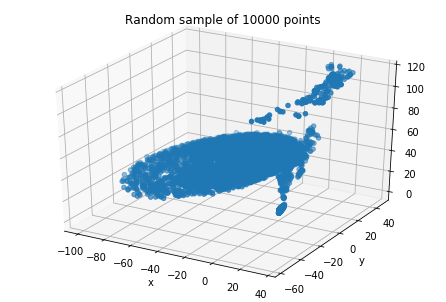

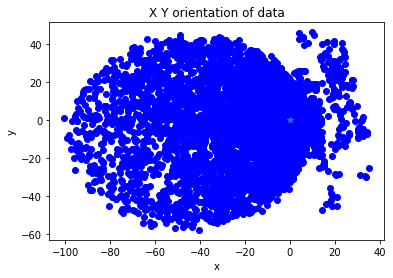

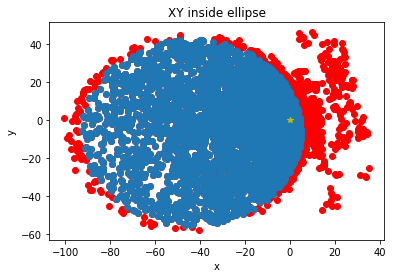

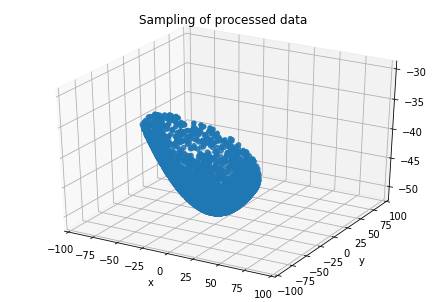

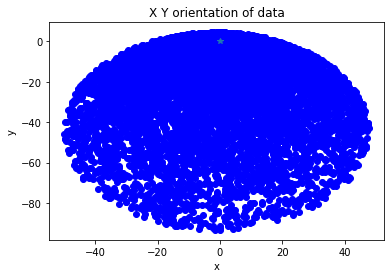

In [5]:
# Only process a pair of scans, reference and signal, using multiple GPUs
for sn in [409,410]:
    re = '{0}/{1}_*.ptx'.format(path, sn)
    print(re)
    fns = glob.glob(re)
    for fn in fns:
        print('Processing: {}'.format(fn))
        processLeicaScan(fn, N=n, rot=rot, ellipse=[xOffset, yOffset, radius, radius, 0.])

Masking file: /home/scratch/psalas/LASSI/gpus/output/singleGPU/409_2019-10-10_23:43:48.ptx.csv
Masking file: /home/scratch/psalas/LASSI/gpus/output/singleGPU/410_2019-10-10_23:50:15.ptx.csv


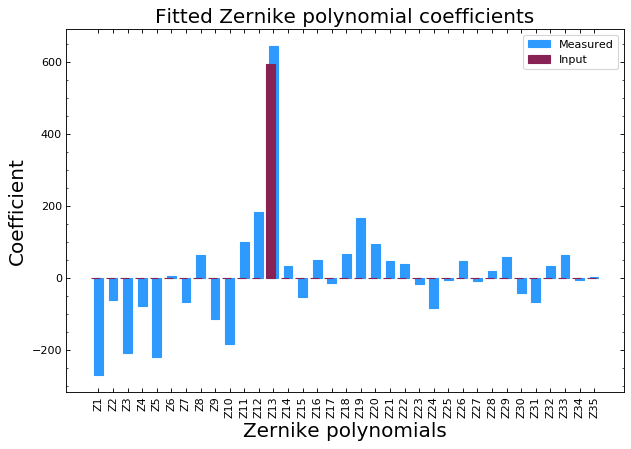

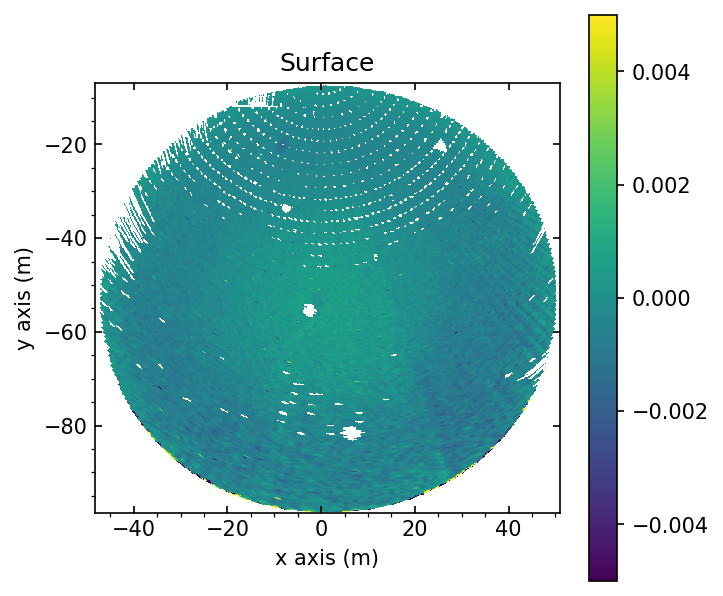

In [8]:
# Extract Zernike coefficients from the signal minus reference.
# Notice that the input is the output from gpus.smoothGPUs, i.e. the .csv files.
ref_file = '/home/scratch/psalas/LASSI/gpus/output/singleGPU/409_2019-10-10_23:43:48.ptx.csv'
sig_file = '/home/scratch/psalas/LASSI/gpus/output/singleGPU/410_2019-10-10_23:50:15.ptx.csv'
x, y, diff, fitlist = extractZernikesLeicaScanPair(ref_file, sig_file)
# What did are we expecting?
# Based on the active surface fits file.
expected = np.zeros(37)
expected[13] = 594.
# Plot a bar chart with the recovered and expected values.
barChartPlot(np.arange(1,36), np.asarray(fitlist[1:36])*1e6, expected=expected[1:36])
# Show the surface deformation map.
surfacePlot(x, y, diff, vmin=-5e-3, vmax=5e-3)

Masking file: /home/scratch/psalas/LASSI/gpus/output/multiGPU/409_2019-10-10_23:43:48.ptx.csv
Masking file: /home/scratch/psalas/LASSI/gpus/output/multiGPU/410_2019-10-10_23:50:15.ptx.csv


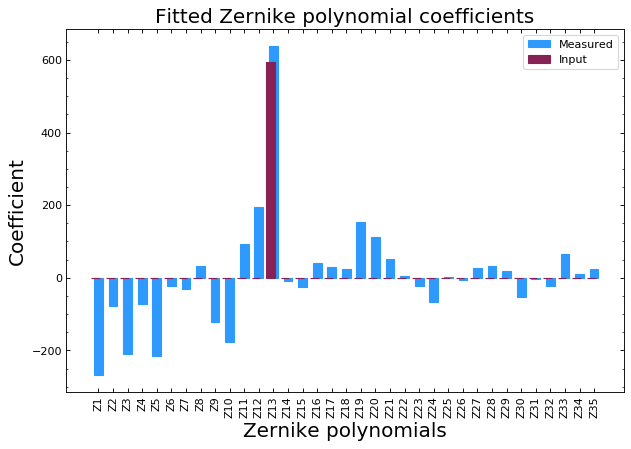

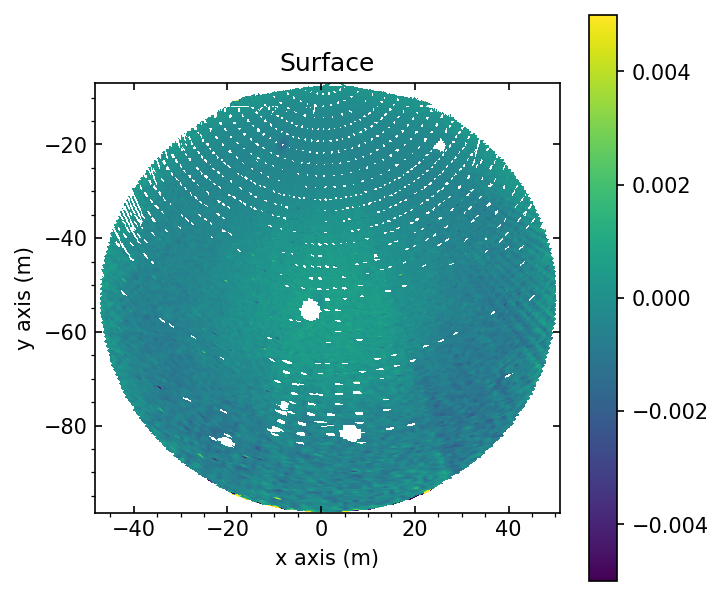

In [7]:
# Extract Zernike coefficients from the signal minus reference.
# Notice that the input is the output from gpus.smoothGPUs, i.e. the .csv files.
ref_file = '/home/scratch/psalas/LASSI/gpus/output/multiGPU/409_2019-10-10_23:43:48.ptx.csv'
sig_file = '/home/scratch/psalas/LASSI/gpus/output/multiGPU/410_2019-10-10_23:50:15.ptx.csv'
x, y, diff, fitlist = extractZernikesLeicaScanPair(ref_file, sig_file)
# What did are we expecting?
# Based on the active surface fits file.
expected = np.zeros(37)
expected[13] = 594.
# Plot a bar chart with the recovered and expected values.
barChartPlot(np.arange(1,36), np.asarray(fitlist[1:36])*1e6, expected=expected[1:36])
# Show the surface deformation map.
surfacePlot(x, y, diff, vmin=-5e-3, vmax=5e-3)